<a href="https://colab.research.google.com/github/diancastroherrera-dot/RedesMulticapa/blob/main/Predicci%C3%B3n_de_la_eficiencia_del_combustible_Diana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mostraremos un ejemplo sencillo de un problema de predicción para el consumo de gasolina de vehiculos, utilizando los mádulos de tensorflow, numpy y pandas y para el conjunto de datos del Auto MPG utilizamos el módulo ucimlrepo.

In [ ]:
#Colocamos un "!" si se ejecuta en google colab
!pip install ucimlrepo


In [ ]:
#Importa la función fetch_ucirepo de la librería ucimlrepo. Esta función es la herramienta principal para descargar conjuntos de datos
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets


In [ ]:
#mostramos el conjunto x
X.head()


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


#El conjunto de datos contiene 398 instancias con las siguientes características:
cylinders: Número de cilindros del motor.
displacement: Desplazamiento del motor (en pulgadas cúbicas).
horsepower: Potencia del motor (en caballos de fuerza).
weight: Peso del vehículo (en libras).
acceleration: Tiempo que toma acelerar de 0 a 60 mph (en segundos).
model year: Año del modelo del automóvil.
origin: Origen del automóvil (1: EEUU, 2: Europa, 3: Japón).
La cuales son nuestros parámetros de entrada.

In [ ]:
#mostramos el conjunto Y
y.head()


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


#El conjunto de datos contiene 398 instancias con las siguientes características:
mpg: Eficiencia de combustible
La cual es nuestra variable objetivo.

In [ ]:
#notamos cuantas variables nulas tiene el conjunto x e y
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [ ]:
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [ ]:
#Hacemos lo siguiente para eliminar las variable no nulas y eliminarlas simultaneamente.
import pandas as pd

df = pd.concat([X, y], axis=1).dropna()


In [ ]:
#notamos cuantas variables nulas tiene el conjunto
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [ ]:
#definimos los conjuntos X e Y
X = df.drop('mpg', axis=1)
y = df['mpg']


In [ ]:
#dividimos los conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)


In [ ]:
#observamos que la longitud del conjunto de entrenamiento y de test son respectivamente
#estas líneas de código sirven como una verificación rápida para asegurar que tus datos están listos para la fase de entrenamiento y evaluación.
print(X_train.shape)
print(X_test.shape)


(313, 7)
(79, 7)


In [ ]:
#escalamos los datos para que los datos tengan una media de 0 y una desviacion  estandar de 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#RED NEURONAL MULTICAPA

In [ ]:
#DEFINIMOS EL MODELO DE RED NEURONAL
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Se utiliza Sequential para definir el modelo de red neuronal.

Se añaden capas ocultas densamente conectadas (Dense) con activación ReLU y una capa de salida con activación identidad para predecir el consumo de gasolina.

In [ ]:
#Crear un optimizador Adam con una tasa de aprendizaje del 0.001
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


In [ ]:
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error'],
)


In [ ]:
#Entrenamos e modelo utilizando el optimizador Adam y la función de perdida error cuadratico medio [mean_squared_error]
history = model.fit(
    X_train, y_train,
    epochs=5, batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 352.6795 - root_mean_squared_error: 18.4190 - val_loss: 21.6998 - val_root_mean_squared_error: 4.6583
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18.3618 - root_mean_squared_error: 4.2519 - val_loss: 12.2381 - val_root_mean_squared_error: 3.4983
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.6672 - root_mean_squared_error: 3.4075 - val_loss: 16.7301 - val_root_mean_squared_error: 4.0902
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.1368 - root_mean_squared_error: 3.5776 - val_loss: 10.5201 - val_root_mean_squared_error: 3.2435
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.0894 - root_mean_squared_error: 3.1396 - val_loss: 10.7576 - val_root_mean_squared_error: 3.2799


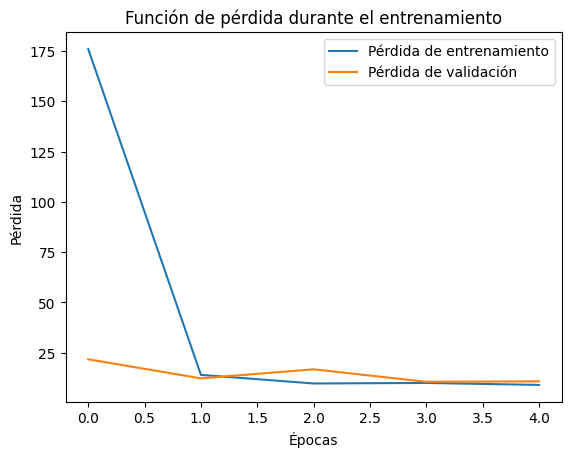

In [ ]:
#importamos matplotlib para graficar la funcion de perdida
import matplotlib.pyplot as plt

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


In [ ]:
#evaluamos el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.3307 - root_mean_squared_error: 3.2063
Test Mean Absolute Error: 3.28


In [ ]:
predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
     Actual  Predicted
82     23.0  23.167633
167    29.0  29.510588
356    32.4  36.453552
120    19.0  18.425310
385    38.0  40.791351


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')


R²: 0.8448180685349191
MSE: 10.75756457094546
